In [ ]:
from grids import Domain, Grid
from poisson import MultiGridSolver
import numpy as np
import matplotlib.pyplot as plt

def calc_curl(Ax, Ay, Az, dx=1, dy=1, dz=1):
    
    vec_field = np.stack([Ax, Ay, Az], axis=-1)
    curl = np.gradient(vec_field,dx,dy,dz,1)
    curl_x = curl[2][:, :, :, 1] - curl[1][:, :, :, 2]
    curl_y = curl[0][:, :, :, 2] - curl[2][:, :, :, 0]
    curl_z = curl[1][:, :, :, 0] - curl[0][:, :, :, 1]
    
    return curl_x, curl_y, curl_z

def g(x, y, z):
    """ Some example function used here to produce the boundary conditions """
    return 0

def f(x, y, z):
    """ Some example function used here to produce the right hand side field """
    if ((x)**2 + (z)**2) < 0.1**2:
        return 100
    else:
        return 0.1
    # return np.exp(-x**2/0.1-y**2/0.1)
def f1(x, y, z):
    """ Some example function used here to produce the right hand side field """
    return 0.1
    # return -np.exp(-x**2/0.1-y**2/0.1)

def example(dir='y'):
    """ This function demonstrates the usage of the poisson module and some of its classes """

    #
    # Make the grid on which to solve the Poisson equation
    #

    domain = Domain(center=(0,0,0), edges=(4,4,4))
    grid = Grid(domain, shape=(33,33,33))

    #
    # Prepare the boundary conditions
    #

    bc = {}
    for index in grid.boundary:
        x, y, z = grid.loc(index)
        bc[index] = g(x, y, z)

    #
    # Prepare the field with the right-hand-side of the Poisson equation.
    #

    # rhs1 = grid.field_from_function(f)
    if dir=='y':
        # data_array = rhs1.values
        rhs = grid.field_from_function(f)
    else:
        # data_array = rhs1.values*0
        # rhs = grid.field_from_array(data_array)
        rhs = grid.field_from_function(f1)
    # print(rhs.values)
#     return rhs
        # rhs is of type Field, which has two properties: grid and values, the
        # latter being a numpy ndarray holding the field values at the grid
        # points

    #
    # Now solve the Poisson equation \Delta u = rhs
    #

    solver = MultiGridSolver(rhs, bc, atol=1.0E-9)

    try:
        solver.solve()
        u = solver.solution()  # u is of type Field
        x_arr = np.array([])
        y_arr = np.array([])
        z_arr = np.array([])
        u_arr = np.array([])
        for index in u.grid.indices():
            (x, y, z), u_val = u[index]
            x_arr = np.append(x_arr,x)
            y_arr = np.append(y_arr,y)
            z_arr = np.append(z_arr,z)
            u_arr = np.append(u_arr,u_val)
        return x_arr,y_arr,z_arr,u_arr,u.values
    except Exception as e:
        print("No convergence")


In [2]:
x,y,z,u,uu = example(dir='x')
x_reshape = x.reshape(33,33,33)
y_reshape = y.reshape(33,33,33)
z_reshape = z.reshape(33,33,33)
Ax = u.reshape(33,33,33)

x,y,z,u,uu = example(dir='y')
x_reshape = x.reshape(33,33,33)
y_reshape = y.reshape(33,33,33)
z_reshape = z.reshape(33,33,33)
Ay = u.reshape(33,33,33)

x,y,z,u,uu = example(dir='z')
x_reshape = x.reshape(33,33,33)
y_reshape = y.reshape(33,33,33)
z_reshape = z.reshape(33,33,33)
Az = u.reshape(33,33,33)


1,   8.1227e-03
2,   4.9881e-04
3,   2.9577e-05
4,   1.6484e-06
5,   9.1658e-08
6,   5.0789e-09
7,   2.7760e-10
1,   4.5275e-01
2,   7.0625e-03
3,   2.0842e-04
4,   6.8509e-06
5,   2.7312e-07
6,   1.2739e-08
7,   6.8469e-10
1,   8.1227e-03
2,   4.9881e-04
3,   2.9577e-05
4,   1.6484e-06
5,   9.1658e-08
6,   5.0789e-09
7,   2.7760e-10


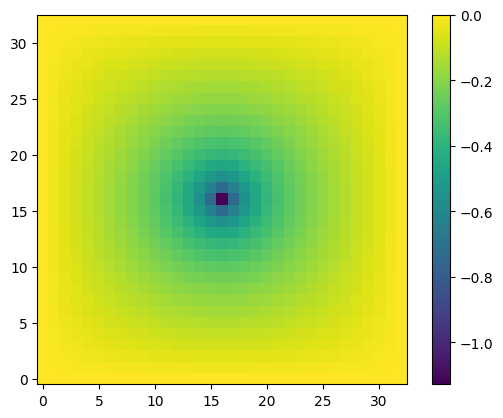

In [3]:
plt.imshow(Ay[:,15,:],origin='lower')
plt.colorbar()

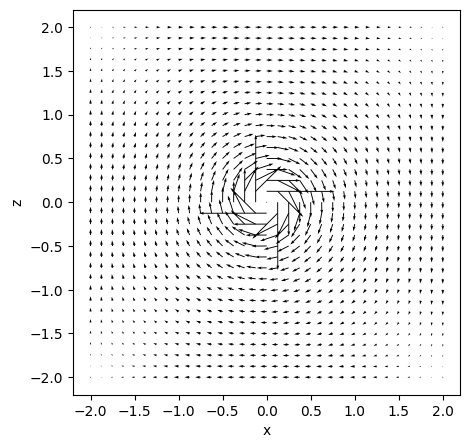

In [4]:
dx = np.linspace(-2, 2, 33)[1]-np.linspace(-2, 2, 33)[0]
Bx, By, Bz = calc_curl(Ax, Ay, uu, dx, dx, dx)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
Ax1, Ay1 = np.meshgrid(np.linspace(-2, 2, 33), np.linspace(-2, 2, 33))
ax.quiver(x_reshape[:,15,:], z_reshape[:,15,:], Bx[:,15,:], Bz[:,15,:])
plt.xlabel('x')
plt.ylabel('z')
# plt.title('J along the z-direction')
# ax = fig.add_subplot(122)
# Ax, Ay = np.meshgrid(np.linspace(-2, 2, 33), np.linspace(-2, 2, 33),indexing='ij')
# ax.quiver(Ax, Ay, Bx[:,:,28], Bz[:,:,28])
plt.show()